### Probability Mass Function

In [1]:
#Import pandas
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

gss = pd.read_hdf('gss.hdf5', 'gss')
type(gss)

pandas.core.frame.DataFrame

In [2]:
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


let's look at the distribution of educ, which records the number of years of education for each respondent.

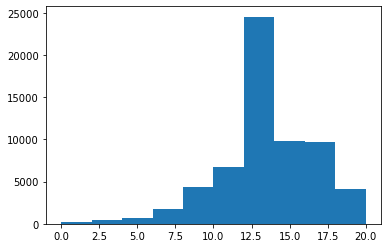

In [3]:
educ = gss['educ']
plt.hist(educ.dropna(), label = 'educ')
plt.show()

Based on the histogram, we can see the general shape of the distribution and the central tendency - it looks like the peak is near 12 years of education. But a histogram is not the best way to visualize this distribution.

An alternative is a probability mass function, or PMF, that contains the unique values in the dataset and how often each one appears. 

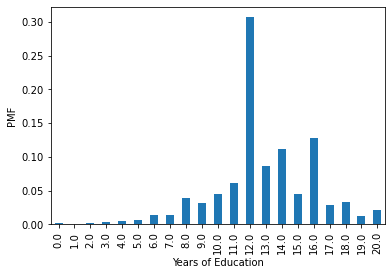

In [4]:
pmf = educ.value_counts().sort_index()/len(educ)
pmf.plot(kind = 'bar')
plt.xlabel('Years of Education')
plt.ylabel('PMF')
plt.show()

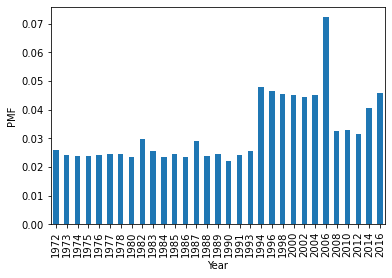

In [5]:
##Example
pmf = gss['year'].value_counts().sort_index()/len(gss['year'])
pmf.plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('PMF')
plt.show()

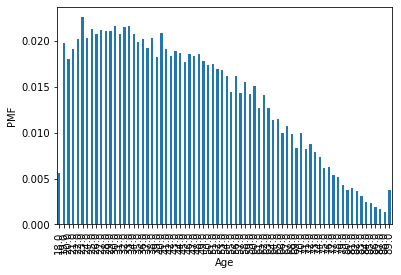

In [6]:
##Example
pmf = gss['age'].value_counts().sort_index()/len(gss['age'])
pmf.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

######################################################################

### Cumulative Distribtuion Functions

CDFs are useful for some computations; they are also a great way to visualize and compare distributions.

if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

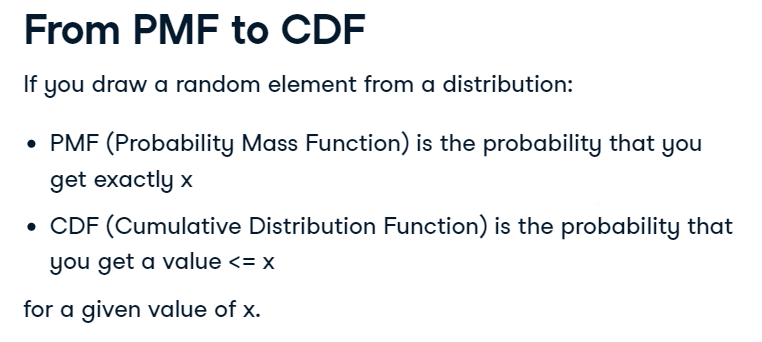

In [7]:
#Calculating CDF 
age = gss['age']

pmf = age.value_counts().sort_index()/len(age)

In [8]:
cdf = pmf.cumsum()

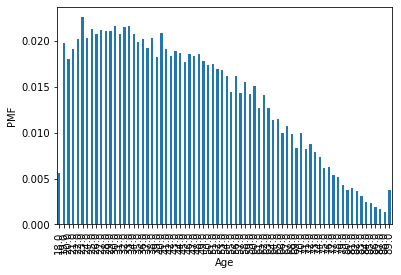

In [9]:
pmf.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

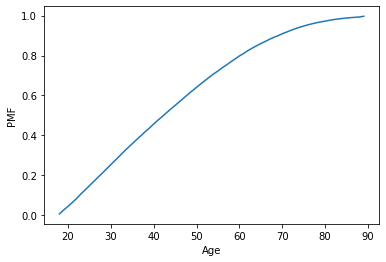

In [10]:
cdf.plot(kind = 'line')
plt.xlabel('Age')
plt.ylabel('PMF')
plt.show()

#######################################################################

In [11]:
#pdf and cdf using scipy


###Normal CDF
from scipy.stats import norm

xs = np.linspace(-3, 3)
ys = norm(0, 1).cdf(xs)

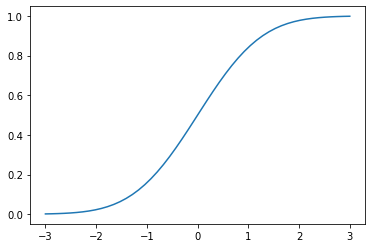

In [12]:
plt.plot(xs, ys)
plt.show()

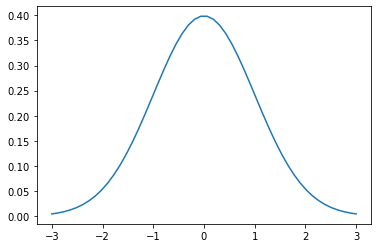

In [13]:
#Normal PDF

xs = np.linspace(-3, 3)
ys = norm(0, 1).pdf(xs)

plt.plot(xs, ys)
plt.show()

Unfortunately, if we compare this PDF to the PMF of the sample, it doesn't work very well. Here's what it looks like.

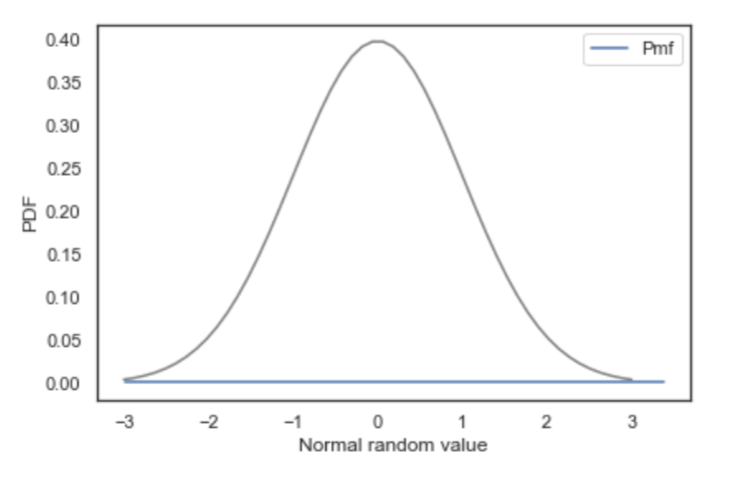

The PMF of the sample is a flat line across the bottom. In the random sample, every value is unique, so they all have the same probability, one in 1000. However, we can use the points in the sample to estimate the PDF of the distribution they came from. This process is called kernel density estimation, or KDE. It's a way of getting from a PMF, a probability mass function, to a PDF, a probability density function.

#### KDE Plot

<AxesSubplot:ylabel='Density'>

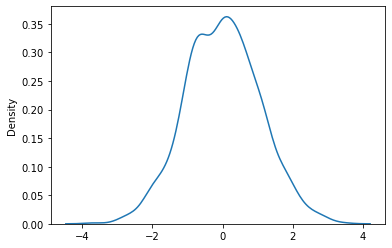

In [14]:
import seaborn as sns
sample = np.random.normal(size = 1000)
sns.kdeplot(sample)

#### KDE and PDF in same plot (Comparison)

<AxesSubplot:ylabel='Density'>

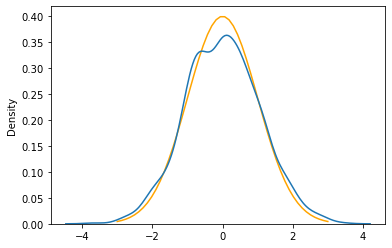

In [15]:
plt.plot(xs, ys, color = 'orange')
sns.kdeplot(sample)

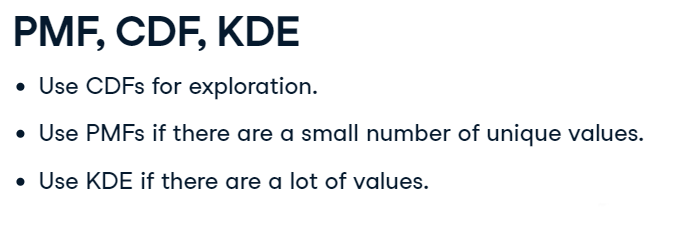

In [16]:
##Example
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = log_income.mean()
std = log_income.std()
print(mean, std)

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)

4.371148677933652 0.4290082383271419


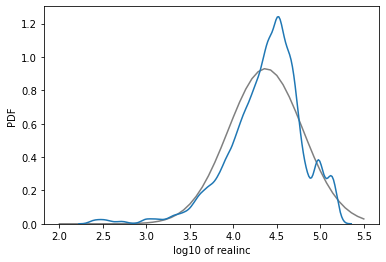

In [17]:
##Example
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Plot the data KDE
sns.kdeplot(log_income)
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.show()